## CIS 4526 Sp24 EDA Review Exercise

### This Review Exercise will cover the following skills set
* Using sql 
* Checking for null values and outliers
* Calculate simple statistics using both SQL and Pandas 
* Calculate skew and correlation
* Basic Data Visualization
* How to fix missing values

**Make sure you have pandasql installed. If not, make sure you run the code in the following cell**

In [1]:
import os
try:
    import pandasql as ps
except:
    print("Failed in import pandasql")
    os.system("pip install pandasql")

**Import all standard libaries**

In [2]:
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Car Crashes dataset ##

In [3]:
crash = pd.read_csv("data/car_crashes2.csv")
print(crash.shape)
crash.head()

(52, 10)


,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state,region,division
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,South,East South Central
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,West,Pacific
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,West,Mountain
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,South,West South Central
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,West,Pacific


* accidents is the total number of crashes for each state
* speeding is the average speeding in each state

In [4]:
crash[crash['region'] == 'Territory']

,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state,region,division
39,17.2,7.1,40.642,17.472,16.016,905.99,153.86,PR,Territory,Territory


In [5]:
crash.describe()

,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,52.000000,51.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,15.817308,5.060235,5.574385,13.648154,14.043558,887.323654,134.865577
std,4.086070,2.033018,5.245624,4.497172,3.737999,176.559356,24.737451
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.775000,3.766500,3.897000,10.611000,11.434000,768.690000,114.732500
50%,15.650000,4.806000,4.629000,13.908000,14.141500,860.075000,136.590000
75%,18.450000,6.531000,5.640500,16.334500,16.719500,1006.347500,152.335000
max,23.900000,9.450000,40.642000,23.661000,21.280000,1301.520000,194.780000


## Question 1. Check if there are any null or NA

**Type in your code here**

In [6]:
crash.isnull().any()

accidents         False
speeding           True
alcohol           False
not_distracted    False
no_previous       False
ins_premium       False
ins_losses        False
state             False
region            False
division          False
dtype: bool

## Question 2. Remove any rows that has null or NA

**Type in your code here**

In [7]:
crash[crash['speeding'].isnull()]

,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state,region,division
32,12.3,NaN,3.567,10.824,9.84,1234.31,150.01,NY,Northeast,Middle Atlantic


In [8]:
crash = crash.dropna()
crash.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 0 to 51
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   accidents       51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   state           51 non-null     object 
 8   region          51 non-null     object 
 9   division        51 non-null     object 
dtypes: float64(7), object(3)
memory usage: 4.4+ KB


## Question 3. Check if there is any outliers in all numerical fields using both scatter and boxplot

**Type in your code here**

In [9]:
crash.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 0 to 51
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   accidents       51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   state           51 non-null     object 
 8   region          51 non-null     object 
 9   division        51 non-null     object 
dtypes: float64(7), object(3)
memory usage: 4.4+ KB


/Users/fuadhassan/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


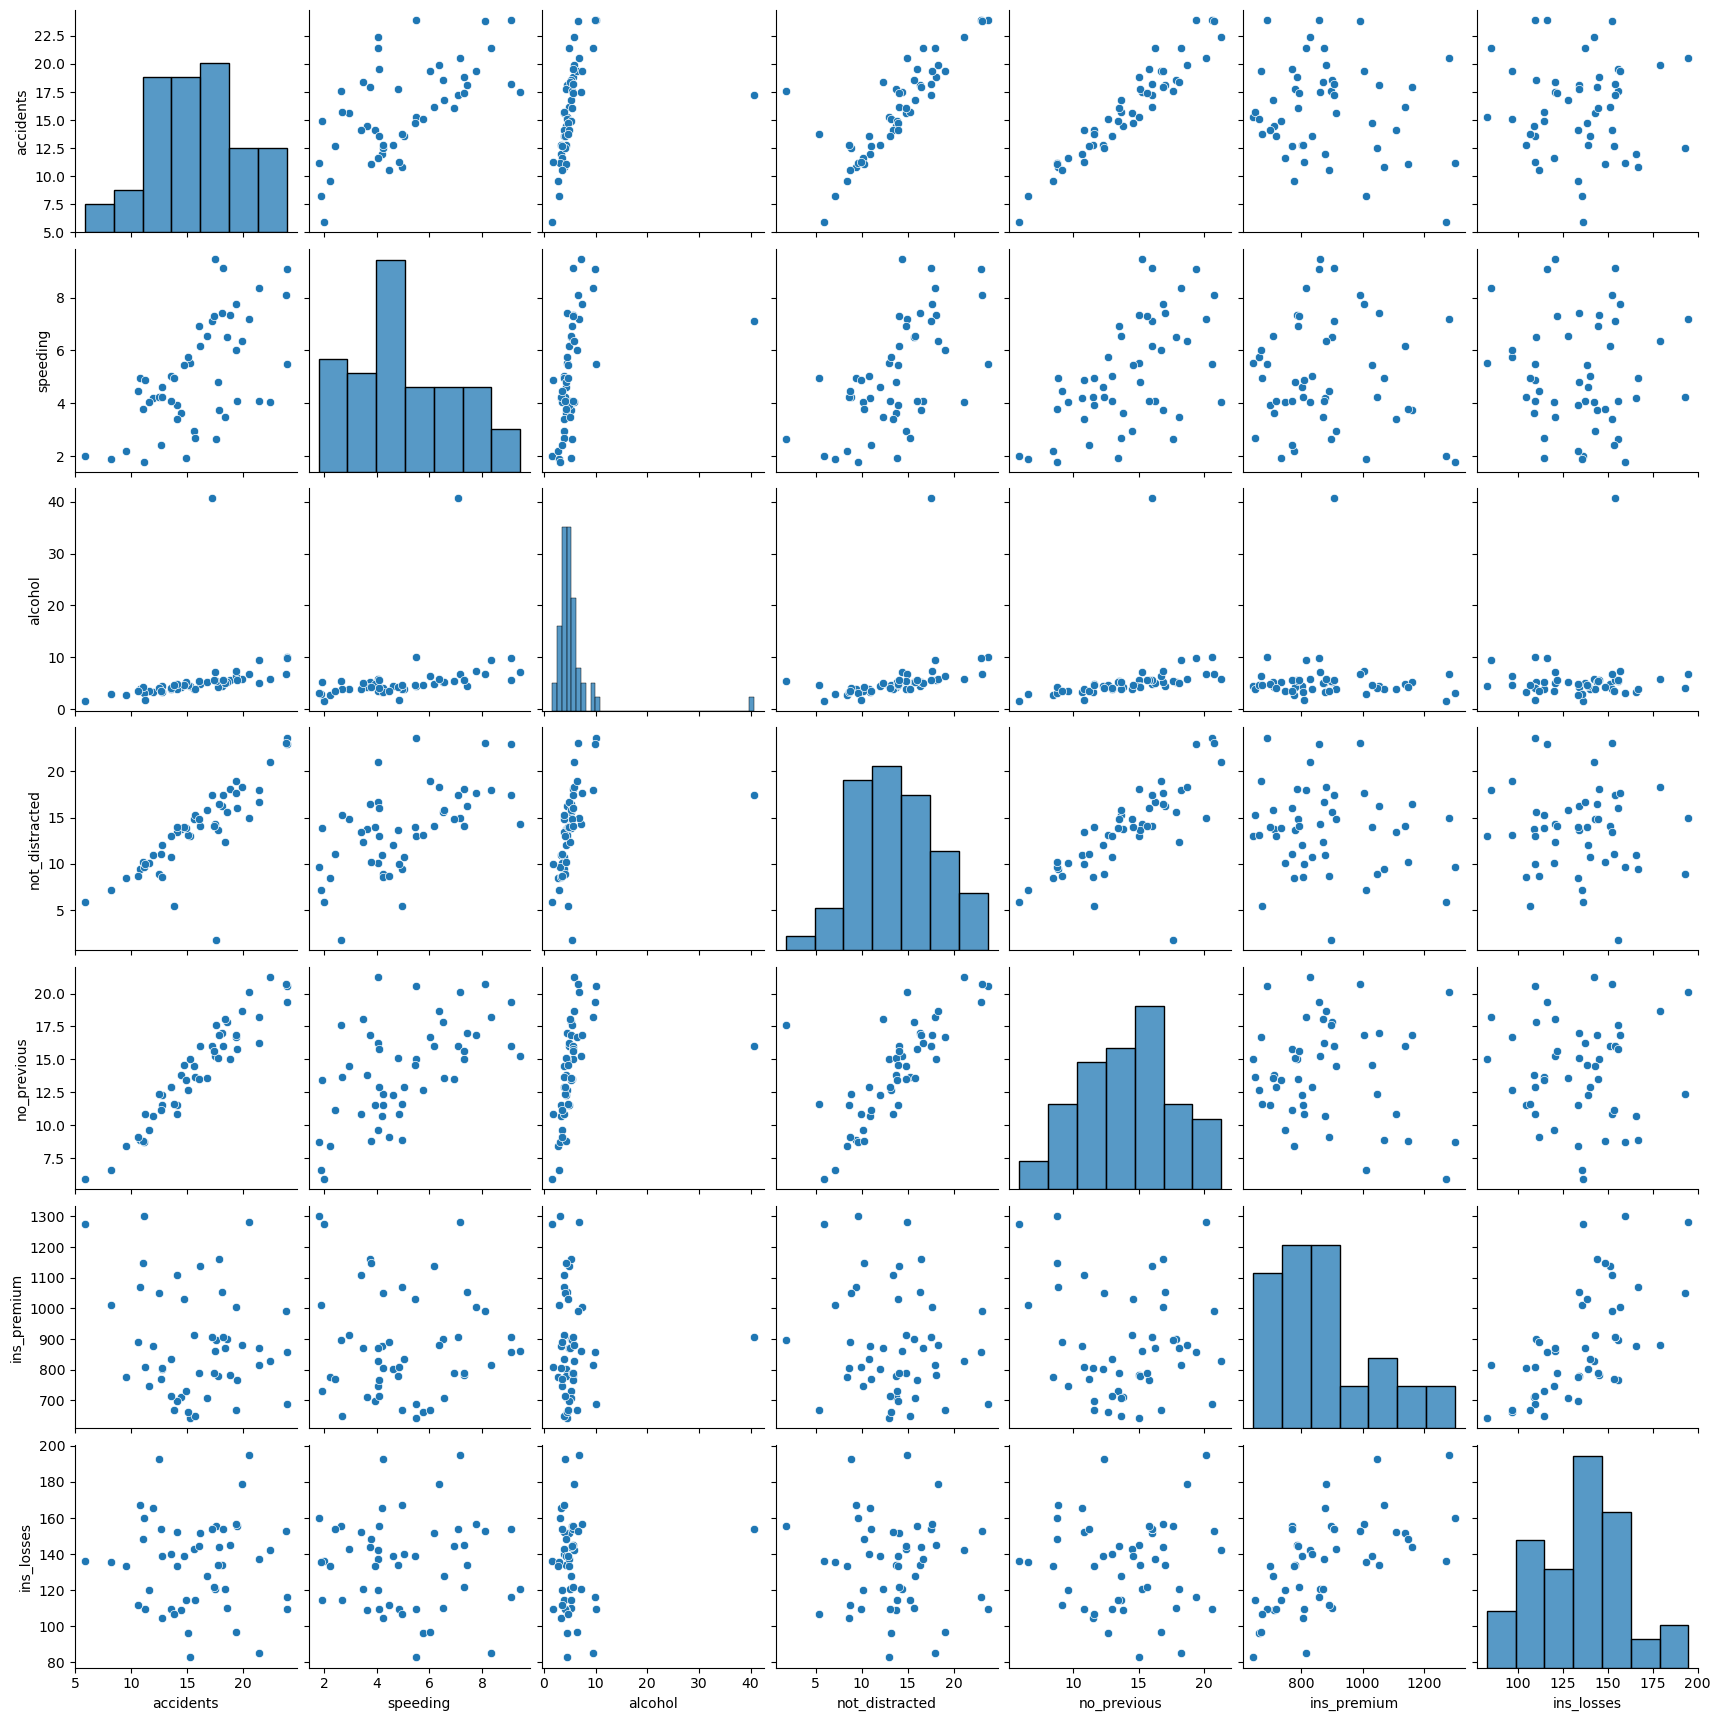

In [10]:
sns.pairplot(crash)
plt.show()

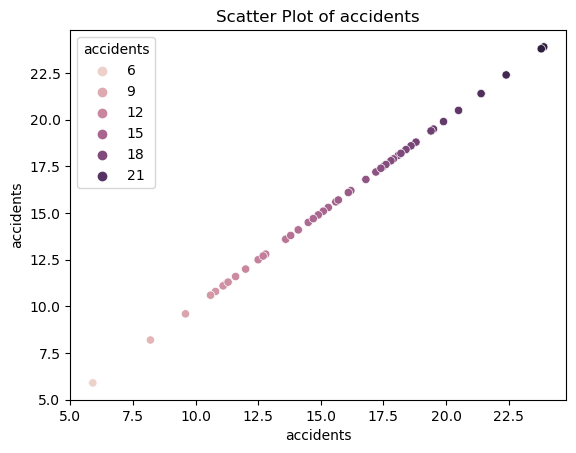

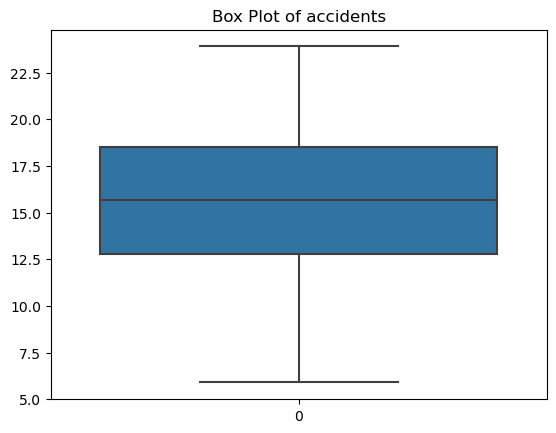

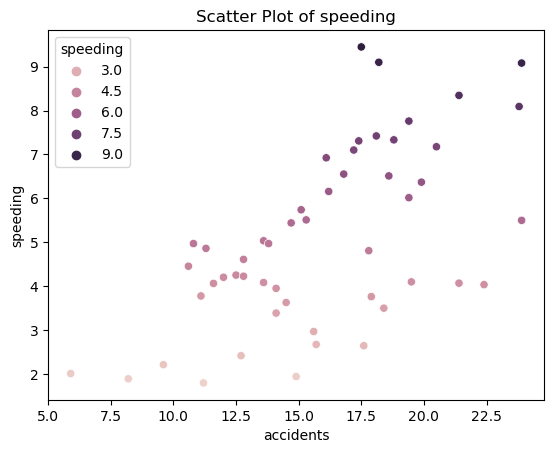

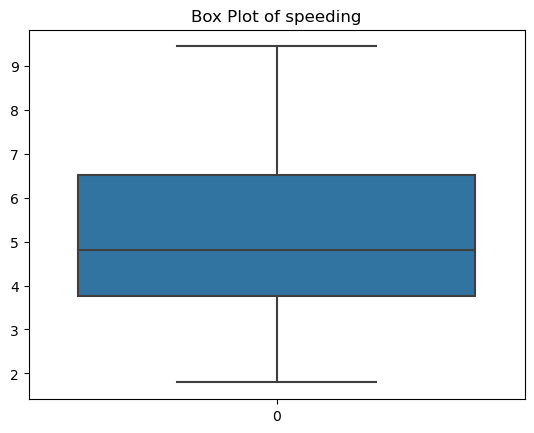

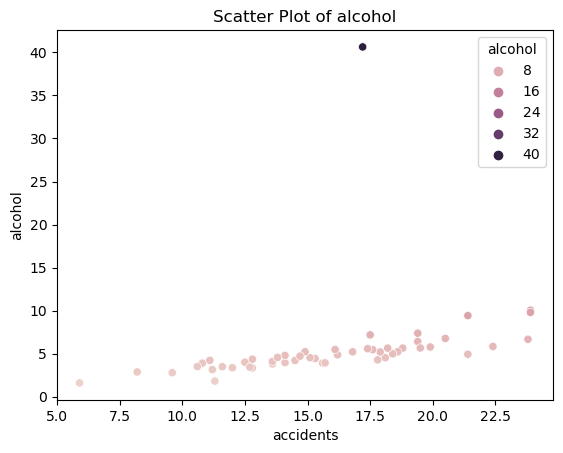

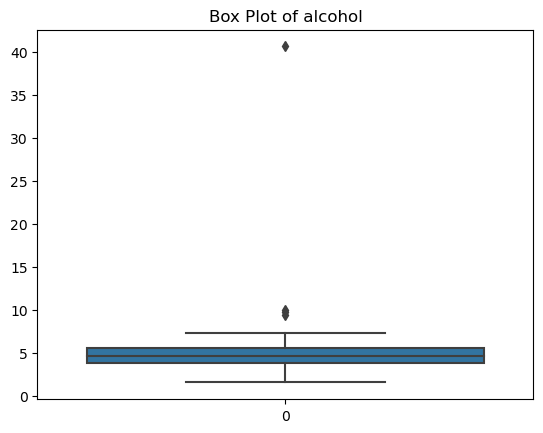

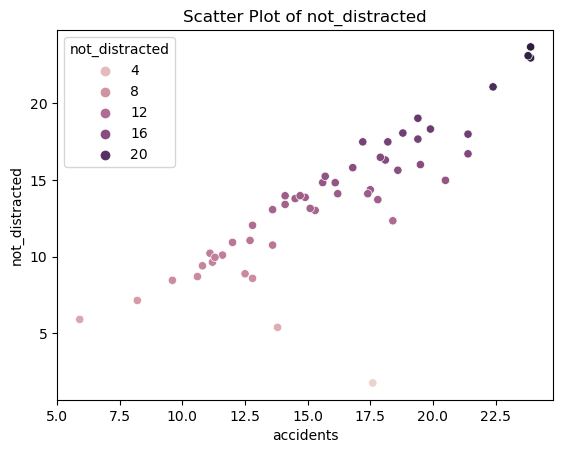

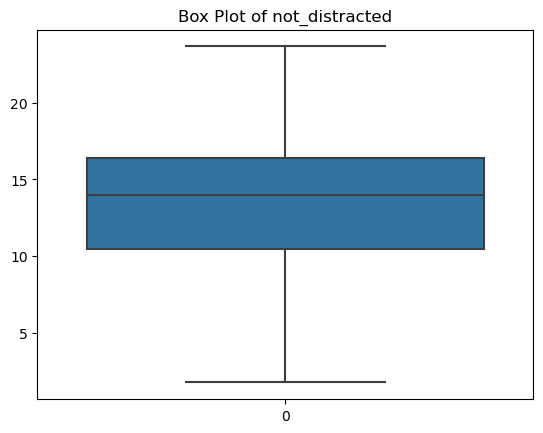

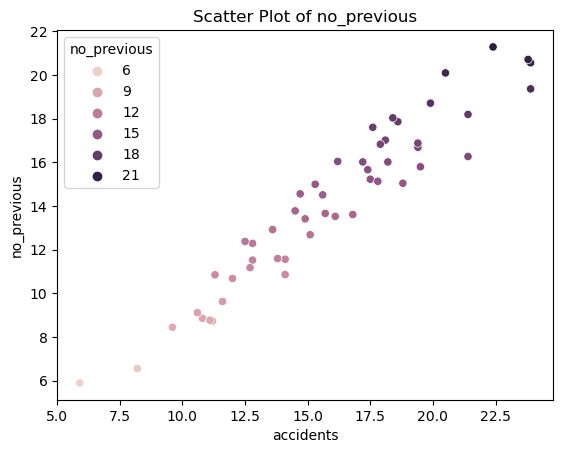

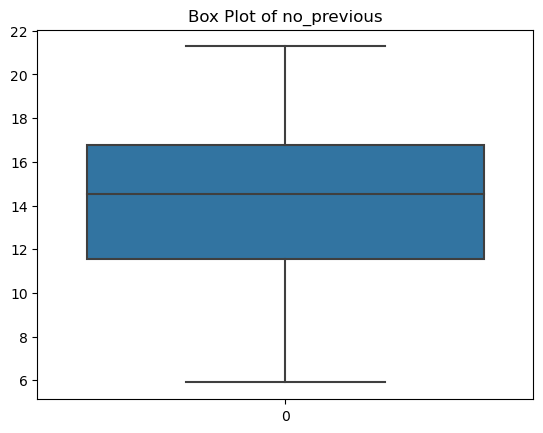

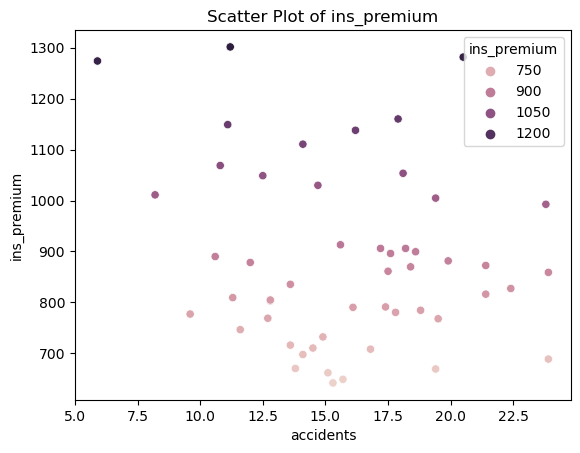

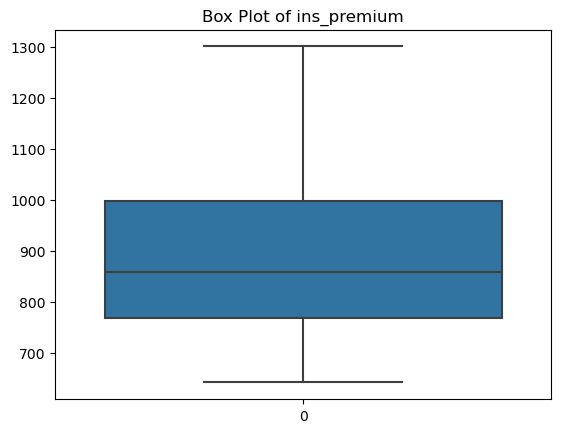

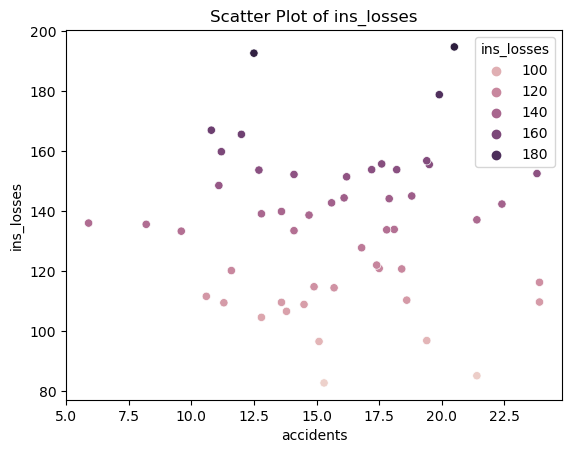

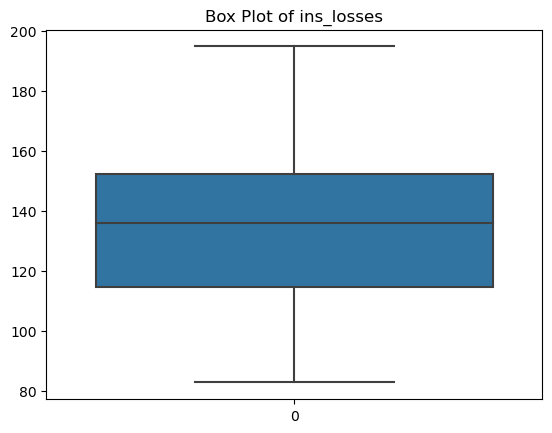

In [11]:
numerical_cols = crash.select_dtypes(exclude='object').columns

for col in numerical_cols:
    sns.scatterplot(data=crash, x='accidents', y=col, hue=col)
    plt.title(f'Scatter Plot of {col}')
    plt.show()
    sns.boxplot(data=crash[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

## Question 4. Display and Remove (the real) outliers

**Type in your code here**

,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state,region,division
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,South,East South Central
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,West,Pacific
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,West,Mountain
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,South,West South Central
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,West,Pacific
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO,West,Mountain
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT,Northeast,New England
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE,South,South Atlantic
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC,South,South Atlantic
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL,South,South Atlantic


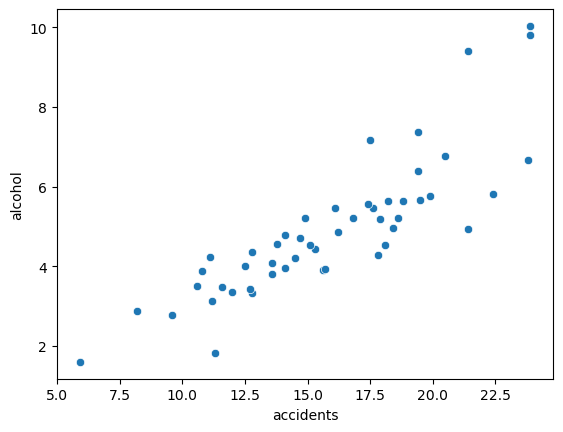

In [12]:
crash = crash.drop(crash[crash['alcohol'] >= 30].index)
sns.scatterplot(x=crash['accidents'], y=crash['alcohol'])
crash

In [13]:
crash.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 51
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   accidents       50 non-null     float64
 1   speeding        50 non-null     float64
 2   alcohol         50 non-null     float64
 3   not_distracted  50 non-null     float64
 4   no_previous     50 non-null     float64
 5   ins_premium     50 non-null     float64
 6   ins_losses      50 non-null     float64
 7   state           50 non-null     object 
 8   region          50 non-null     object 
 9   division        50 non-null     object 
dtypes: float64(7), object(3)
memory usage: 4.3+ KB


## Question 5. Calculate the average speeding in usa and Northeast region using SQL

**Type in your code here**

In [14]:
sql = 'select region, count(*), avg(speeding) from crash group by region'
ps.sqldf(sql)

,region,count(*),avg(speeding)
0,Midwest,12,4.215583
1,Northeast,8,4.424750
2,South,17,5.220118
3,West,13,5.865000


In [31]:
sql = "select count(*) as Count, avg(speeding) from crash"
df = ps.sqldf(sql)
df

,Count,avg(speeding)
0,50,5.01944


## Question 6. Calculate the average alcohol for each region using SQL

**Type in your code here**

In [15]:
sql = 'select region as Region, count(*) as Count, avg(alcohol) as Alcohol_avg from crash group by region'
ps.sqldf(sql)

,Region,Count,Alcohol_avg
0,Midwest,12,4.996917
1,Northeast,8,3.980500
2,South,17,5.414647
3,West,13,4.754077


## Question 7. Calculate the number of occurrences, mean, min, max of the speeding for each divison using SQL

**Type in your code here**

In [16]:
sql = 'select division, count(*), AVG(speeding),MIN(speeding), MAX(speeding) from crash group by division'
ps.sqldf(sql)

,division,count(*),AVG(speeding),MIN(speeding),MAX(speeding)
0,East North Central,5,4.106600,3.384,4.968
1,East South Central,4,4.533250,2.640,7.332
2,Middle Atlantic,2,5.446000,1.792,9.100
3,Mountain,8,5.812250,3.496,8.346
4,New England,6,4.084333,1.886,5.738
5,Pacific,5,5.949400,4.200,9.450
6,South Atlantic,9,5.030444,2.006,9.082
7,West North Central,7,4.293429,1.937,6.923
8,West South Central,4,6.333750,4.032,7.760


## Question 8. Answer Question 7 but use Pandas functions

**Type in your code here**

In [17]:
crash.groupby(['division'])['speeding'].describe()

,count,mean,std,min,25%,50%,75%,max
division,,,,,,,,
East North Central,5.0,4.106600,0.665705,3.384,3.62500,3.9480,4.60800,4.968
East South Central,4.0,4.533250,1.985597,2.640,3.70950,4.0805,4.90425,7.332
Middle Atlantic,2.0,5.446000,5.167536,1.792,3.61900,5.4460,7.27300,9.100
Mountain,8.0,5.812250,1.524017,3.496,4.98875,5.4735,6.70950,8.346
New England,6.0,4.084333,1.299621,1.886,3.84550,4.0700,4.74600,5.738
Pacific,5.0,5.949400,2.382195,4.200,4.22400,4.4520,7.42100,9.450
South Atlantic,9.0,5.030444,2.546183,2.006,2.96400,4.2500,6.55200,9.082
West North Central,7.0,4.293429,2.005279,1.937,2.43850,4.8060,5.75550,6.923
West South Central,4.0,6.333750,1.637184,4.032,5.78400,6.7715,7.32125,7.760


## Question 9. Calculate the Standard deviation, Skew and Kurtosis for the accidents, speeding, alcohol for each region. Based on the results, describe any insights that you may have on the dataset ?

**Type in your code here**

In [18]:
from scipy.stats import skew, kurtosis

# Calculate standard deviation
std_by_region = crash.groupby('region').agg(
    {'accidents': np.std, 'speeding': np.std, 'alcohol': np.std})

# Calculate skewness
skew_by_region = crash.groupby('region').agg(
    {'accidents': skew, 'speeding': skew, 'alcohol': skew})

# Calculate kurtosis
kurt_by_region = crash.groupby('region').agg(
    {'accidents': kurtosis, 'speeding': kurtosis, 'alcohol': kurtosis})

# Print the results
print("Standard Deviation:")
print(std_by_region)
print("\nSkewness:")
print(skew_by_region)
print("\nKurtosis:")
print(kurt_by_region)

Standard Deviation:
           accidents  speeding   alcohol
region                                  
Midwest     3.588988  1.537451  1.824432
Northeast   3.077453  2.327773  0.872950
South       4.537037  2.220711  1.773576
West        3.325118  1.803138  1.910356

Skewness:
           accidents  speeding   alcohol
region                                  
Midwest     0.827604  0.105489  1.822129
Northeast   0.623456  0.843209  0.612763
South      -1.023960  0.156468  0.301037
West        0.057086  0.614240  1.021399

Kurtosis:
           accidents  speeding   alcohol
region                                  
Midwest     0.839429 -0.925423  3.061283
Northeast  -0.320613  0.173105 -0.242619
South       1.022963 -1.301447  1.216560
West       -1.115215 -0.733334  1.024489


## Question 10. Plot the histogram of accidents distribution for different region using 5 bins

**Type in your answer here**

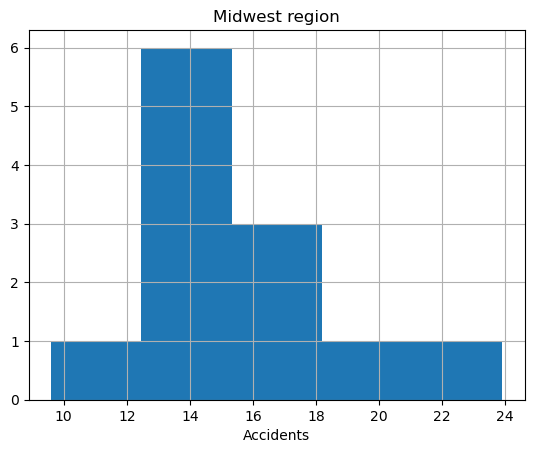

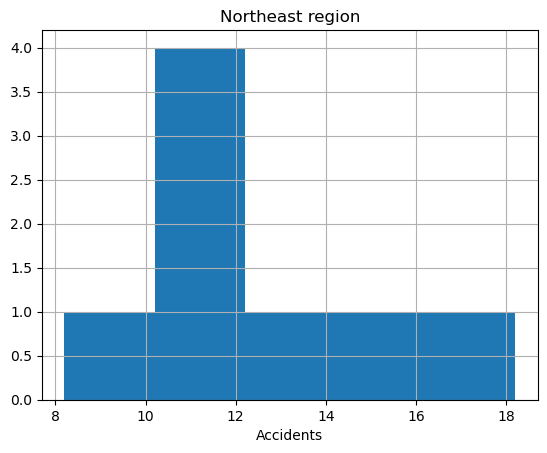

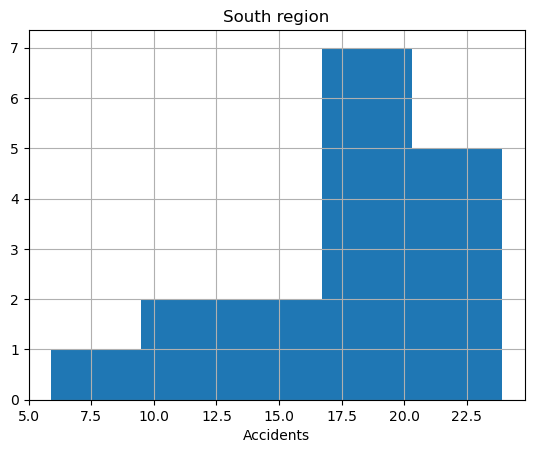

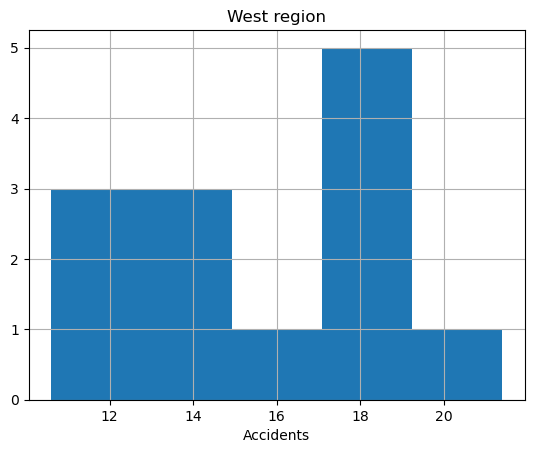

In [19]:
# for region in crash['region'].unique():
for region, data in crash.groupby('region'):
    plt.figure()
    data['accidents'].hist(bins=5)
    plt.xlabel('Accidents')
    plt.title(f'{region} region')
    plt.show()

### Now Load a different dataset (MPG dataset number 3)

In [20]:
mpg = pd.read_csv("data/mpg3.csv")
print(mpg.shape)
mpg.head()

(405, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,usa,ford torino


# Question 11: Check to see if there are any missing values. Fix the missing values by imputing value from the mean.

### Type your code here to fix the missing values by imputing value from the mean

<Axes: >

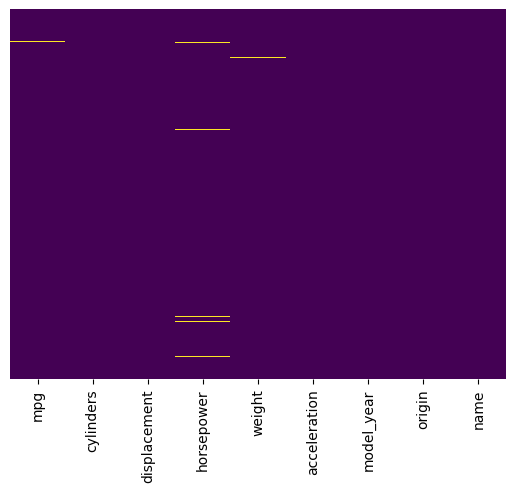

In [21]:
sns.heatmap(mpg.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [22]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           404 non-null    float64
 1   cylinders     405 non-null    int64  
 2   displacement  405 non-null    float64
 3   horsepower    399 non-null    float64
 4   weight        404 non-null    float64
 5   acceleration  405 non-null    float64
 6   model_year    405 non-null    int64  
 7   origin        405 non-null    object 
 8   name          405 non-null    object 
dtypes: float64(5), int64(2), object(2)
memory usage: 28.6+ KB


In [23]:
mpg.isna().sum()

mpg             1
cylinders       0
displacement    0
horsepower      6
weight          1
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [24]:
mpg[pd.isna(mpg['mpg'])]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
35,NaN,4,113.0,95.0,2228.0,14.0,71,japan,toyota corona


In [25]:
mpg['mpg'].fillna(mpg['mpg'].mean(), inplace=True)

In [26]:
mpg[pd.isna(mpg['horsepower'])]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
36,25.0,4,98.0,NaN,2046.0,19.0,71,usa,ford pinto
131,21.0,6,200.0,NaN,2875.0,17.0,74,usa,ford maverick
336,40.9,4,85.0,NaN,1835.0,17.3,80,europe,renault lecar deluxe
342,23.6,4,140.0,NaN,2905.0,14.3,80,usa,ford mustang cobra
360,34.5,4,100.0,NaN,2320.0,15.8,81,europe,renault 18i
380,23.0,4,151.0,NaN,3035.0,20.5,82,usa,amc concord dl


In [27]:
mpg['horsepower'].fillna(mpg['horsepower'].mean(), inplace=True)

In [28]:
mpg[pd.isna(mpg['weight'])]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
53,17.0,6,240.0,88.0,NaN,14.5,71,usa,ford Neo 2000


In [29]:
mpg['weight'].fillna(mpg['weight'].mean(), inplace=True)

In [30]:
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64